## HW2 - Model Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import MatrixMethods as mm
from SingleImage import SingleImage
from ImageBlock import ImageBlock
from BlockSimulation import *
from scipy import linalg as la
from functools import partial


# Set print options to suppress scientific notation
np.set_printoptions(suppress=True)

## Part 1 - Simulate block of images with multiple flight strips

In [2]:
# define random seed
np.random.seed(0)

a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2, tie_pattern='4 corners', control_pattern='random block',num_control_points=5, rotations_sigma=10, altitude=1000)

block = a.simulate_block()

In [3]:
len(block.images)

4

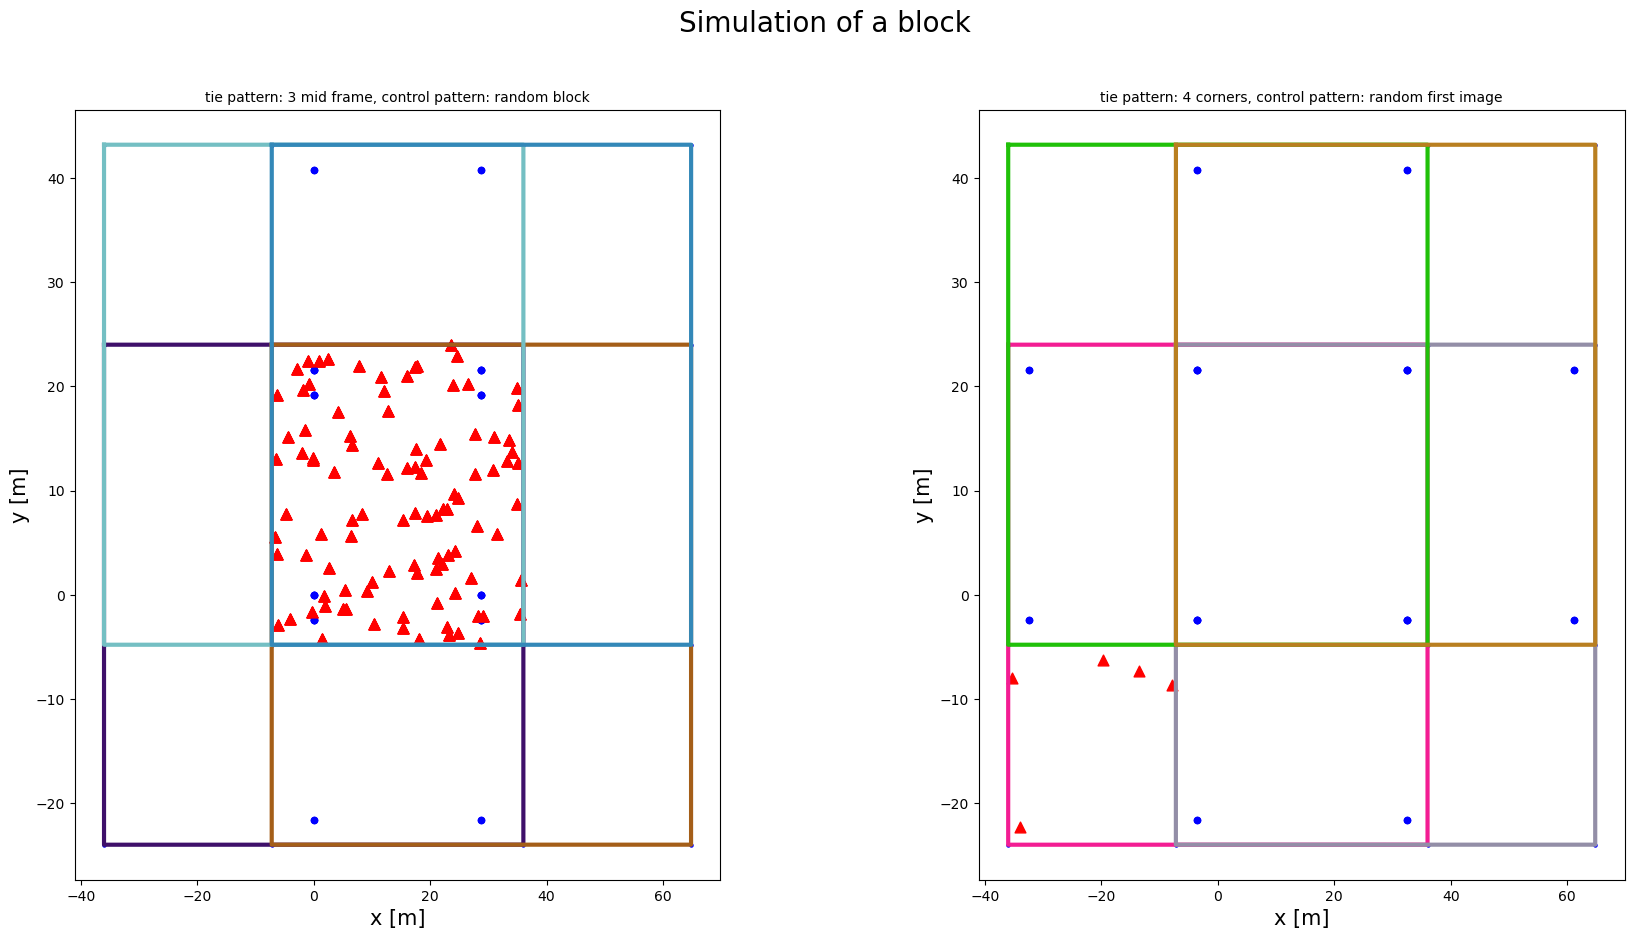

In [4]:
# define random seed
np.random.seed(0)

# plot different arguments options for the simulation using subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Simulation of a block', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2,  tie_pattern='3 mid frame', control_pattern='random block',num_control_points=100, rotations_sigma=10, altitude=100)
block = a.simulate_block()
block.draw_block(ax = axes[0])
# add title to the plot usimg the parameters of the simulation
axes[0].set_title('tie pattern: 3 mid frame, control pattern: random block', fontsize=10)
axes[0].set_xlabel('x [m]', fontsize=15)
axes[0].set_ylabel('y [m]', fontsize=15)
# axes[0].axis('equal')

np.random.seed(0)
a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2,  tie_pattern='4 corners', control_pattern='random first image', num_control_points=5, rotations_sigma=10, altitude=100)
block = a.simulate_block()
block.draw_block(ax = axes[1])
axes[1].set_title('tie pattern: 4 corners, control pattern: random first image', fontsize=10)
axes[1].set_xlabel('x [m]', fontsize=15)
axes[1].set_ylabel('y [m]', fontsize=15)
# axes[1].axis('equal')

plt.show()
# fig.savefig('Simulation of a block.png')


## Calculate condition number of the block

<Axes: >

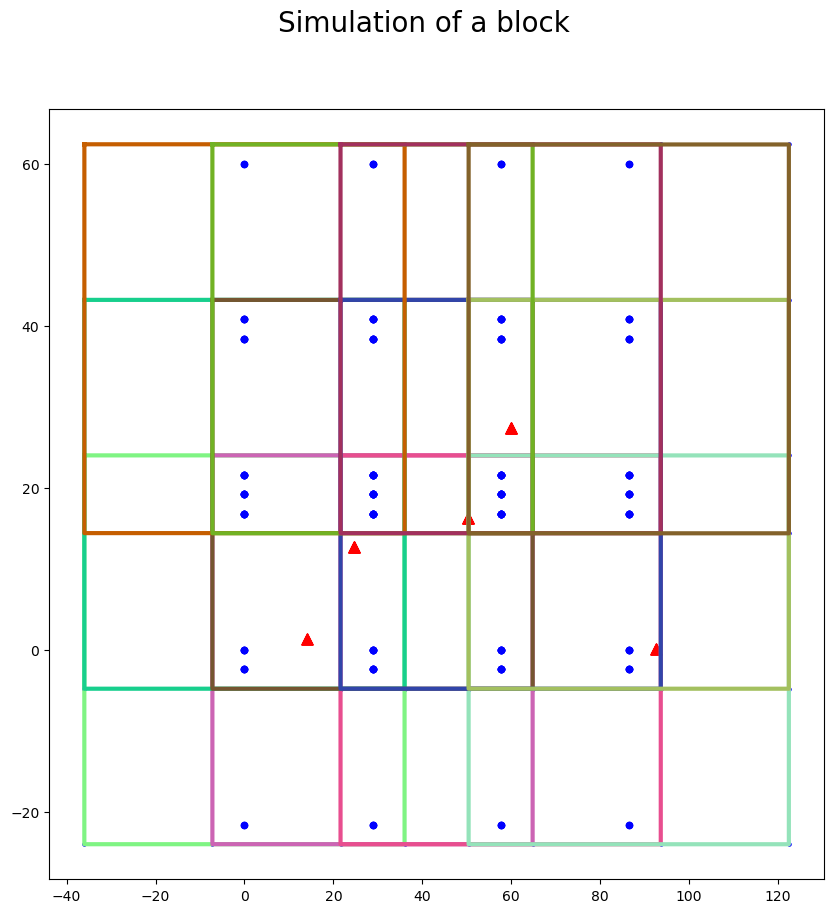

In [5]:
# define random seed
np.random.seed(0)
# plot different arguments options for the simulation using subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle('Simulation of a block', fontsize=20)
# simulate a block
a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=4, num_strips=3,  tie_pattern='3 mid frame', control_pattern='random block',num_control_points=5, rotations_sigma=10, altitude=100)
block = a.simulate_block()
# plot the block
block.draw_block(ax = axes)


In [6]:
# compute the eigenvalues of N
eigvals = la.eigvals(block.N)
# print(eigvals)
# compute the condition number of N
cond = np.max(eigvals)/np.min(eigvals)
cond

(741817513.6923527+0j)

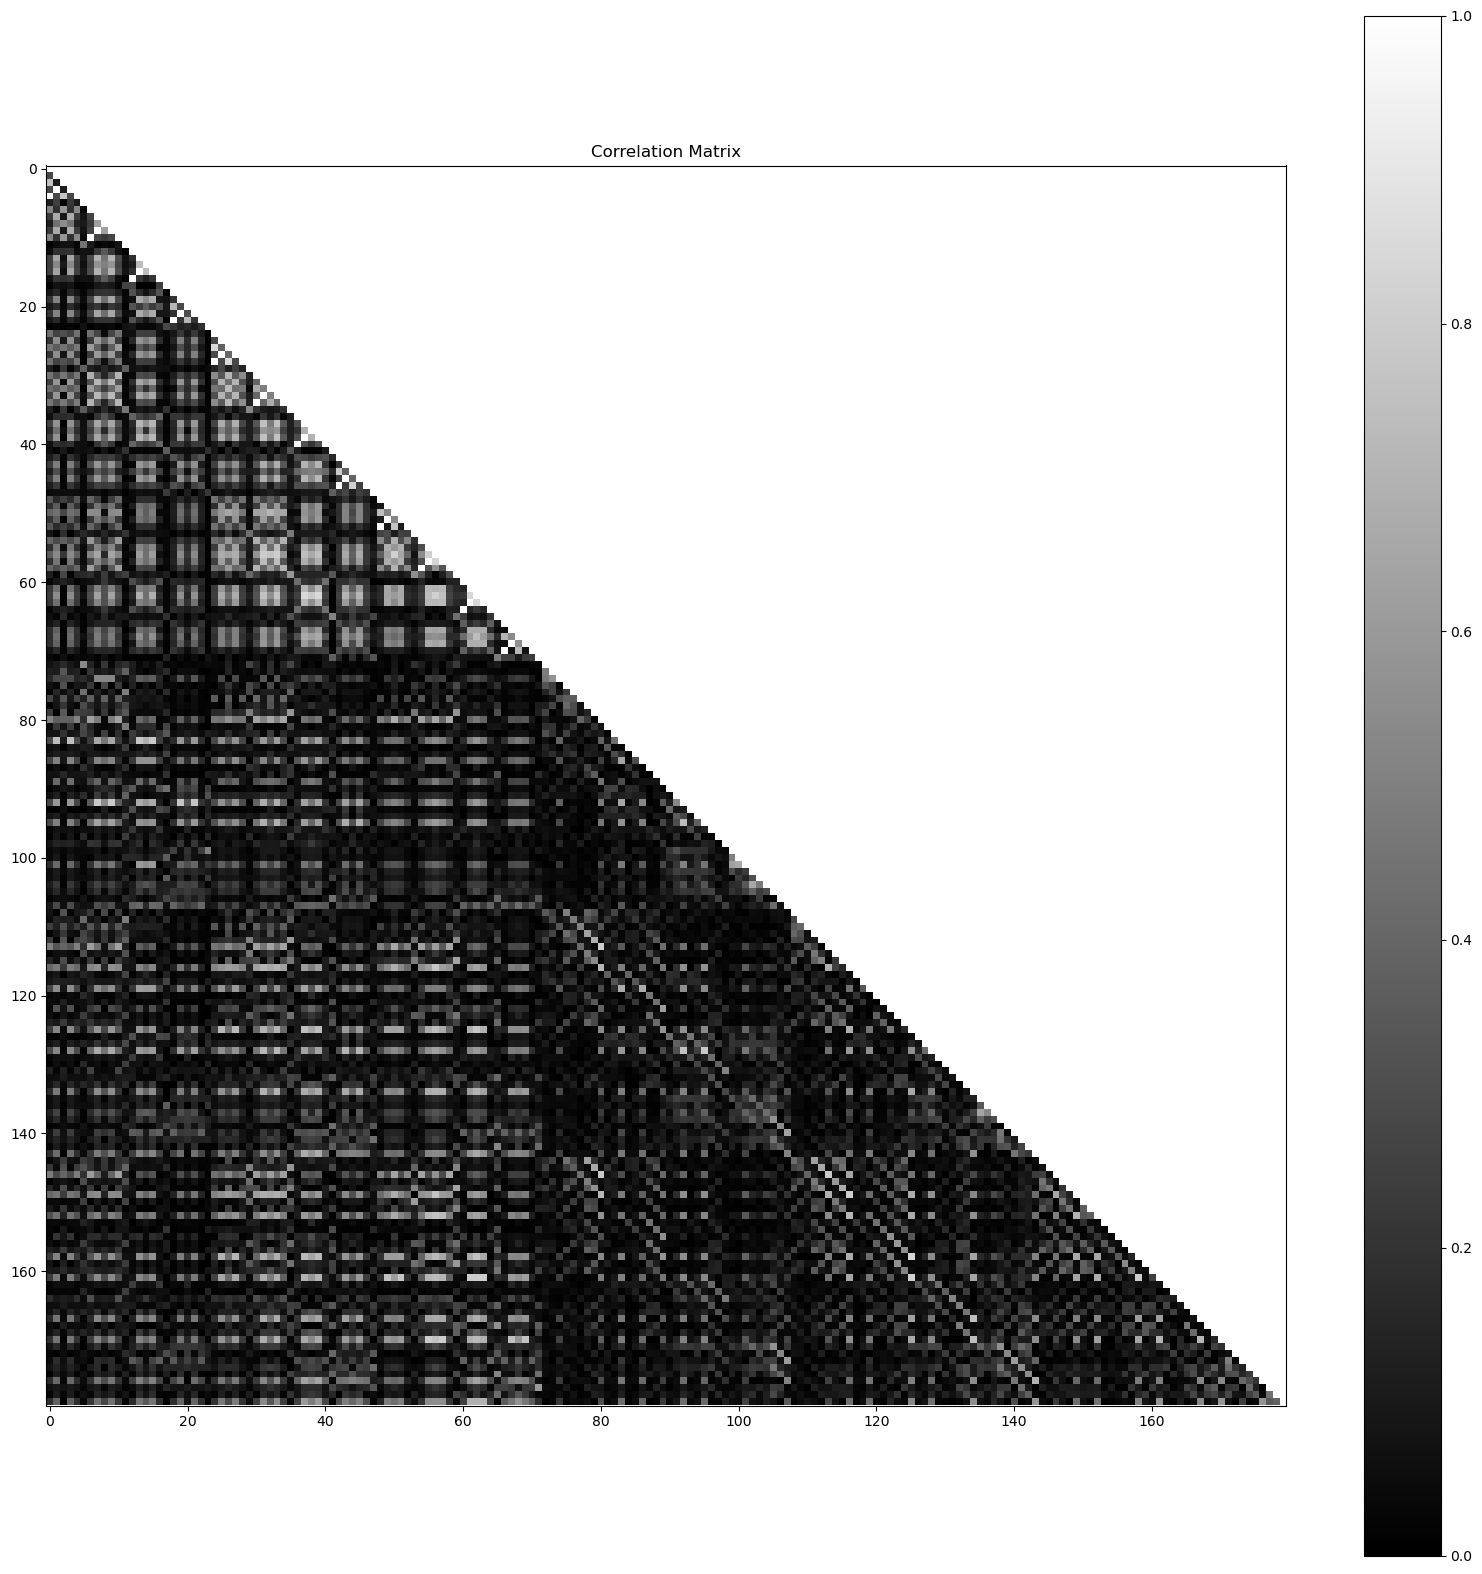

In [7]:
# compute the covariance matrix
Cov = np.linalg.inv(block.N)

# compute the correlation matrix
diag_sqrt = np.sqrt(np.diag(Cov))
correlation_matrix = Cov / np.outer(diag_sqrt, diag_sqrt)

# Mask the upper triangle of the correlation matrix
mask = np.tri(correlation_matrix.shape[0], k=-1).astype(bool).T
correlation_matrix = np.ma.array(correlation_matrix, mask=mask)

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(np.abs(correlation_matrix), cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

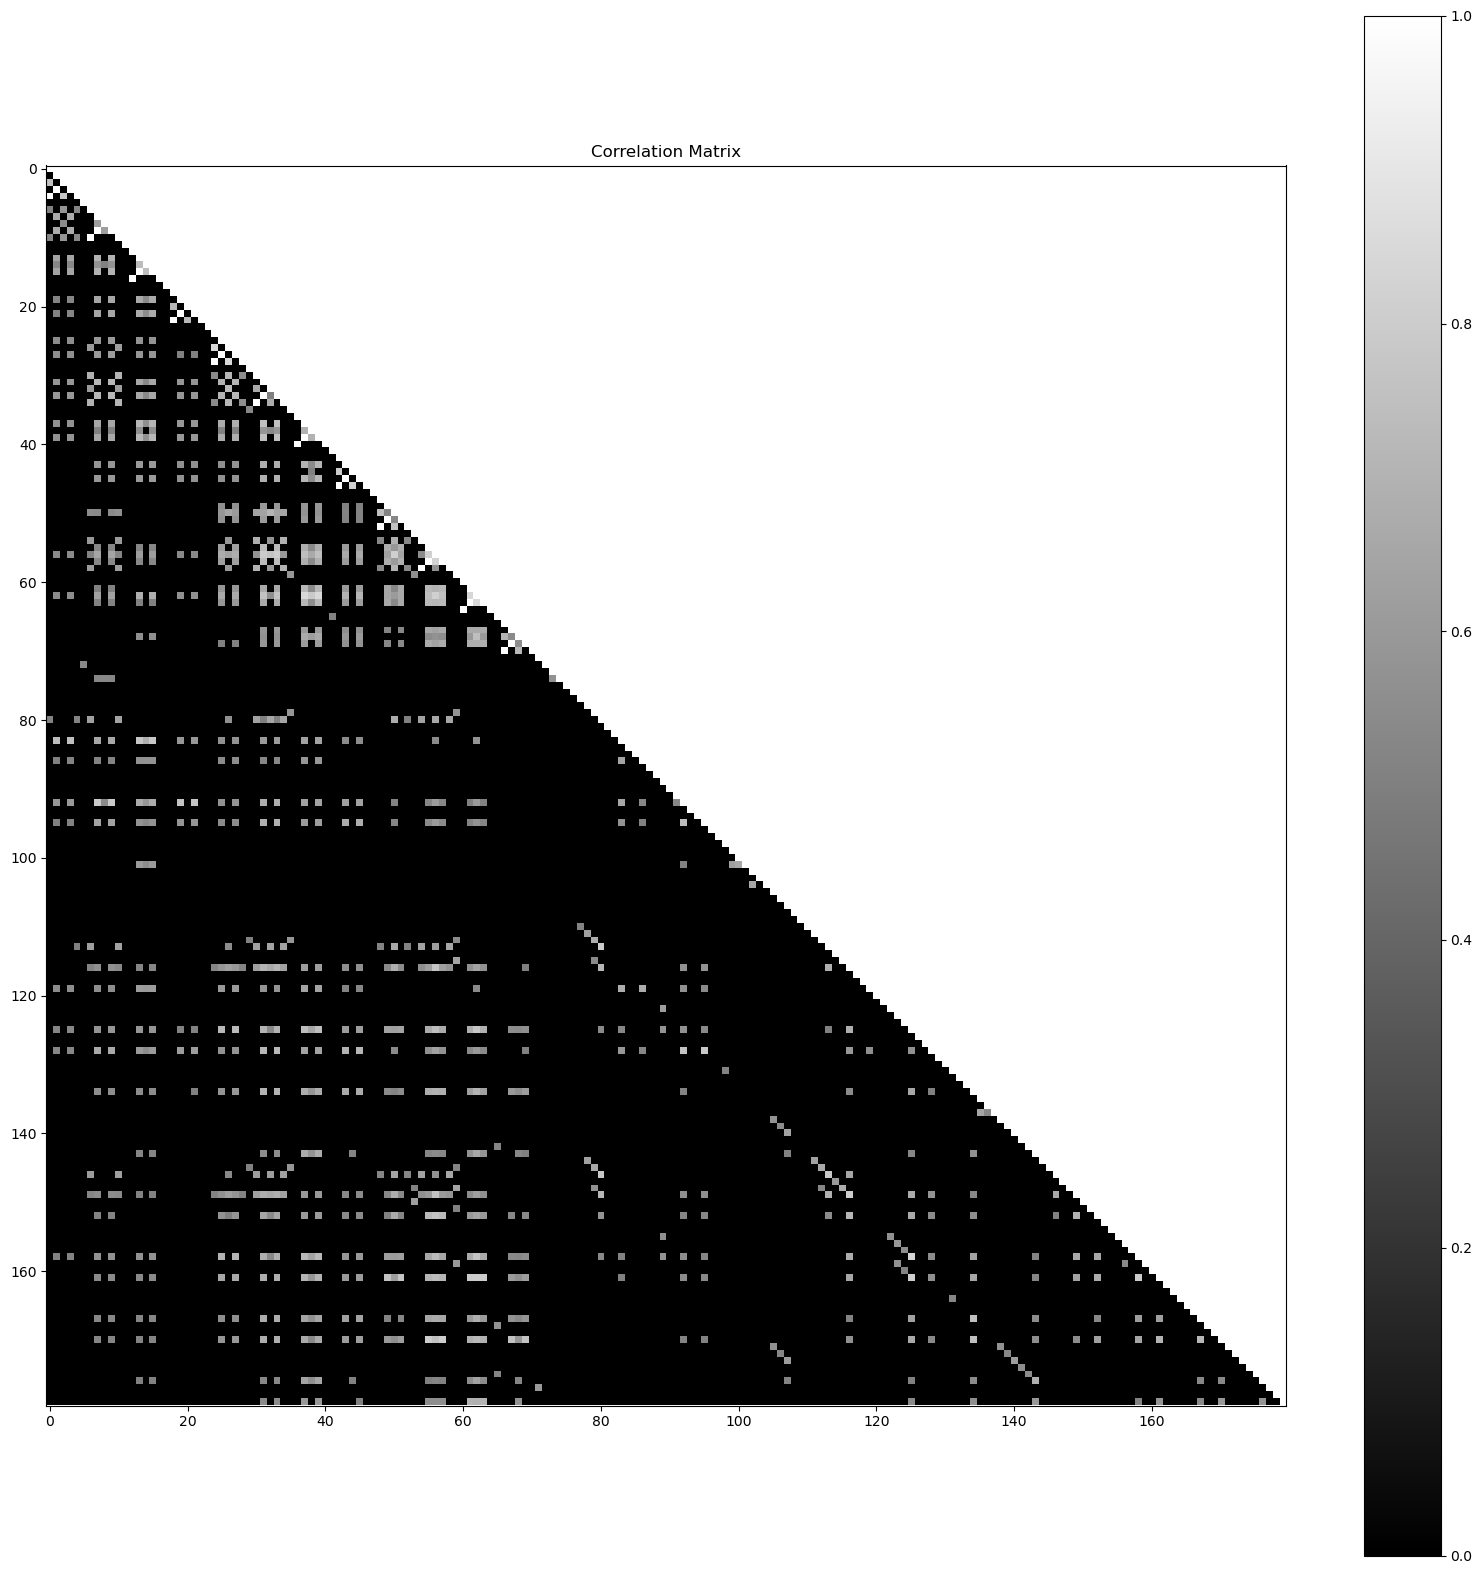

In [22]:
# Mask the values with absolute value lower than 0.5
correlation_matrix[np.abs(correlation_matrix) <= 0.5]=0
# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(np.abs(correlation_matrix), cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

## Find optinal configuration for the block

In [9]:
# create dataframe for configuration for simulating blocks
config = pd.DataFrame(columns=['focal_length', 'image_size', 'overlap', 'num_images', 'num_strips', 'tie_pattern', 'control_pattern', 'num_control_points', 'rotations_sigma', 'altitude'])
focal_length = 50
image_size = (36, 24)
overlap = [0.6, 0.7, 0.8, 0.9]
num_images = 4
num_strips = 3
tie_pattern = ['3 mid frame', '4 corners']
control_pattern = ['random block', 'random first image', '5 points']
num_control_points = 5
rotations_sigma = 5
altitude = 100

# populate the dataframe
for overlap_value in overlap:
    for tie_pattern_value in tie_pattern:
        for control_pattern_value in control_pattern:
            config.loc[len(config)] = [focal_length, image_size, overlap_value, num_images, num_strips, tie_pattern_value, control_pattern_value, num_control_points, rotations_sigma, altitude]

config

,focal_length,image_size,overlap,num_images,num_strips,tie_pattern,control_pattern,num_control_points,rotations_sigma,altitude
0,50,"(36, 24)",0.6,4,3,3 mid frame,random block,5,5,100
1,50,"(36, 24)",0.6,4,3,3 mid frame,random first image,5,5,100
2,50,"(36, 24)",0.6,4,3,3 mid frame,5 points,5,5,100
3,50,"(36, 24)",0.6,4,3,4 corners,random block,5,5,100
4,50,"(36, 24)",0.6,4,3,4 corners,random first image,5,5,100
5,50,"(36, 24)",0.6,4,3,4 corners,5 points,5,5,100
6,50,"(36, 24)",0.7,4,3,3 mid frame,random block,5,5,100
7,50,"(36, 24)",0.7,4,3,3 mid frame,random first image,5,5,100
8,50,"(36, 24)",0.7,4,3,3 mid frame,5 points,5,5,100
9,50,"(36, 24)",0.7,4,3,4 corners,random block,5,5,100


In [17]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


blocks = []
failed_runs = []

for index, row in config.iterrows():
    focal_length = row['focal_length']
    image_size = row['image_size']
    overlap = row['overlap']
    num_images = row['num_images']
    num_strips = row['num_strips']
    tie_pattern = row['tie_pattern']
    control_pattern = row['control_pattern']
    num_control_points = row['num_control_points']
    rotations_sigma = row['rotations_sigma']
    altitude = row['altitude']

    print('control pattern: {}, tie pattern: {}, overlap: {}'.format(control_pattern, tie_pattern, overlap))

    block = None

    try:
        simulation = SimulateBlock(focal_length, image_size, overlap, num_images, num_strips, tie_pattern, control_pattern, num_control_points, rotations_sigma, altitude)
        block = simulation.simulate_block()
        SimulateBlock.add_noise_to_block(block, sigma_location=0.5, sigma_rotation=100, sigma_image_points=1, sigma_tie_points=0.5)
        block.BundleAdjustment(0.01, 100, method='naive')
    except Exception as e:
        print('Exception occurred for configuration {}'.format(index))
        failed_runs.append(index)

    blocks.append(block)
    
failed_configurations = config.loc[failed_runs]

# Restore warning behavior (optional)
warnings.filterwarnings("default")

control pattern: random block, tie pattern: 3 mid frame, overlap: 0.6
iteration:  1 
 condition number A:  19288.884533426222
 condition number N:  372061072.45920116 

iteration:  2 
 condition number A:  19478.548124641748
 condition number N:  379413840.5995588 

iteration:  3 
 condition number A:  19478.1598387588
 condition number N:  379398706.1464711 

control pattern: random first image, tie pattern: 3 mid frame, overlap: 0.6
iteration:  1 
 condition number A:  1.053606000879562e+16
 condition number N:  1.052814770078341e+16 

iteration:  2 
 condition number A:  1.0485598905671708e+16
 condition number N:  1.0463712349102588e+16 

iteration:  3 
 condition number A:  1.053572929274256e+16
 condition number N:  1.0472698864687298e+16 

iteration:  4 
 condition number A:  1.0532554457401482e+16
 condition number N:  1.0466841847761176e+16 

iteration:  5 
 condition number A:  1.0927353998880504e+16
 condition number N:  1.1116499259627208e+16 

iteration:  6 
 condition num

In [18]:
failed_configurations

,focal_length,image_size,overlap,num_images,num_strips,tie_pattern,control_pattern,num_control_points,rotations_sigma,altitude
1,50,"(36, 24)",0.6,4,3,3 mid frame,random first image,5,5,100
4,50,"(36, 24)",0.6,4,3,4 corners,random first image,5,5,100
7,50,"(36, 24)",0.7,4,3,3 mid frame,random first image,5,5,100
10,50,"(36, 24)",0.7,4,3,4 corners,random first image,5,5,100
13,50,"(36, 24)",0.8,4,3,3 mid frame,random first image,5,5,100
16,50,"(36, 24)",0.8,4,3,4 corners,random first image,5,5,100
19,50,"(36, 24)",0.9,4,3,3 mid frame,random first image,5,5,100


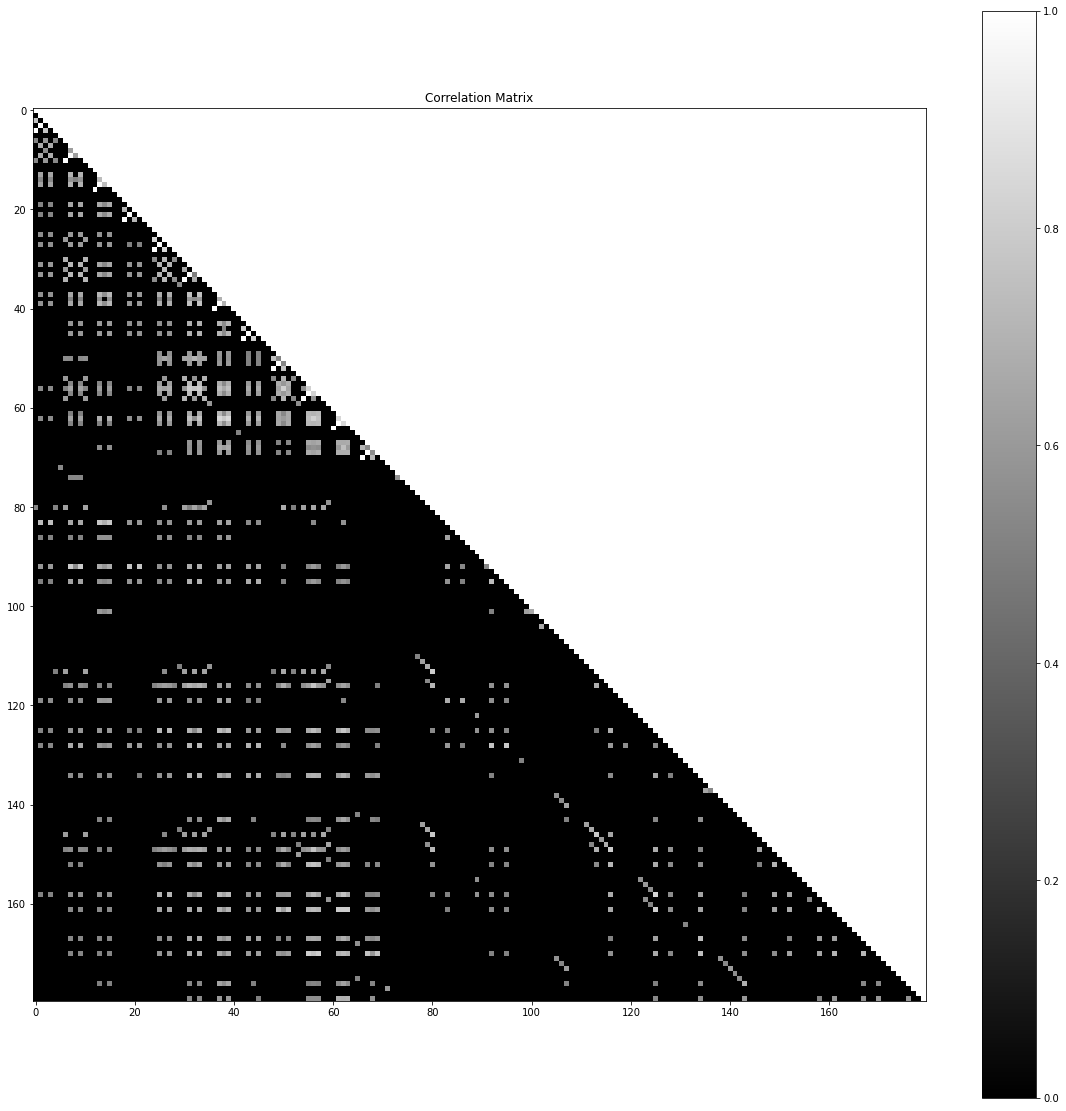

In [23]:
# Mask the values with absolute value lower than 0.5
correlation_matrix[np.abs(correlation_matrix) <= 0.5]=0
# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(np.abs(correlation_matrix), cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()